<a href="https://colab.research.google.com/github/swilsonmfc/anomaly/blob/master/DatasetTaxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taxi
![alt text](https://www.amny.com/wp-content/uploads/2019/06/Taxicabsxx_cvvvof_NYC-1024x588.jpg)

# Notes
nyc_taxi.csv: Number of NYC taxi passengers, where the five anomalies occur during the NYC marathon, Thanksgiving, Christmas, New Years day, and a snow storm. The raw data is from the NYC Taxi and Limousine Commission. The data file included here consists of aggregating the total number of taxi passengers into 30 minute buckets.


# Setup

In [6]:
import pandas as pd
import numpy as np

# Data

In [7]:
df = pd.read_csv('https://github.com/numenta/NAB/raw/master/data/realKnownCause/nyc_taxi.csv')
df.columns = ['TIMESTAMP', 'VALUE']

In [8]:
df.head()

,TIMESTAMP,VALUE
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [9]:
df['TIMESTAMP'] = pd.to_datetime(df.TIMESTAMP)
df = df.set_index('TIMESTAMP')

In [10]:
df.head()

,VALUE
TIMESTAMP,
2014-07-01 00:00:00,10844
2014-07-01 00:30:00,8127
2014-07-01 01:00:00,6210
2014-07-01 01:30:00,4656
2014-07-01 02:00:00,3820


# EDA

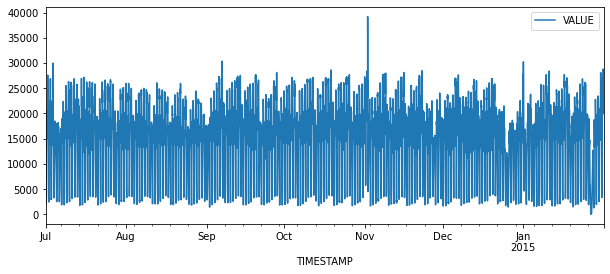

In [11]:
df.plot(figsize=(10,4))

# Labels

In [12]:
labels = ["2014-11-01 19:00:00.000000",
          "2014-11-27 15:30:00.000000",
          "2014-12-25 15:00:00.000000",
          "2015-01-01 01:00:00.000000",
          "2015-01-27 00:00:00.000000"]

In [13]:
df['OUTLIER'] = np.where(df.index.isin(labels), 1, 0)

# Save

In [14]:
!mkdir -p data

In [15]:
df.to_csv('data/data_anomaly_taxi.csv', index=False)